In [1]:
## Digits

In [2]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from gympy.layers import Linear, Relu, Sigmoid, Softmax, Tanh
from gympy.networks import NeuralNetwork, DataSet
from gympy.optimizers import SGD, TimeDecay
from gympy.loss import CategoricalCrossEntropy, Accuracy
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
digits = load_digits()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
X_train.shape

(1347, 64)

In [5]:
Y = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1,1)).T
Y.shape

(10, 1347)

In [6]:
X = StandardScaler().fit_transform(X_train).T
print(X.shape)


(64, 1347)


In [7]:

n_iter=390
model = NeuralNetwork(
    layers = [
        Tanh(n_input=64, n_output=32, dropout_rate=0.0),
        Softmax(n_input=32, n_output=10)
    ],
    optimizer = SGD(learning_rate=1e-2, decay=TimeDecay(rate=0.0)),
    loss = CategoricalCrossEntropy(),
    n_iter=n_iter
)

In [8]:
tt = model.forward(X[:,0:1])
tt

array([[0.10075994],
       [0.09828758],
       [0.10107303],
       [0.10030151],
       [0.09974783],
       [0.09934718],
       [0.10220353],
       [0.10034805],
       [0.09871365],
       [0.0992177 ]])

In [9]:
yy = Y[:,0:1]
yy

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [10]:
np.log(0.5)

-0.6931471805599453

In [11]:
CategoricalCrossEntropy().forward(tt, Y[:,0:1])

2.2807891015035775

In [12]:

dataset = DataSet(
    x = X,
    y = Y,
    batch_size=128
)


<class 'gympy.optimizers.optimizers.SGD'>
0 cost 2.3036221237363637 iter 11
100 cost 0.8315937134159 iter 1011
200 cost 0.3330343102895146 iter 2011
300 cost 0.1923480522599197 iter 3011
400 cost 0.13942179580721312 iter 4011


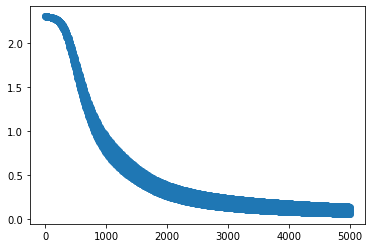

In [13]:
n_iter=5000
model.train_dataset(dataset, show=100, n_epochs=500)
plt.scatter(np.arange(len(model.cost)).tolist(),model.cost)

In [14]:
model.forward(X[:,[453]])

array([[1.72637007e-02],
       [2.44108297e-03],
       [1.38547338e-03],
       [3.10628179e-04],
       [1.66281101e-02],
       [9.44050529e-01],
       [1.15150364e-02],
       [4.55569721e-03],
       [1.19291120e-03],
       [6.56830443e-04]])

In [15]:
test_idx = np.random.choice(X.shape[1],16, replace=False)

In [16]:
prob = model.forward(X[:,test_idx])
pred = np.argmax(prob,axis=0)

true_vals = np.argmax(Y[:,test_idx], axis=0)

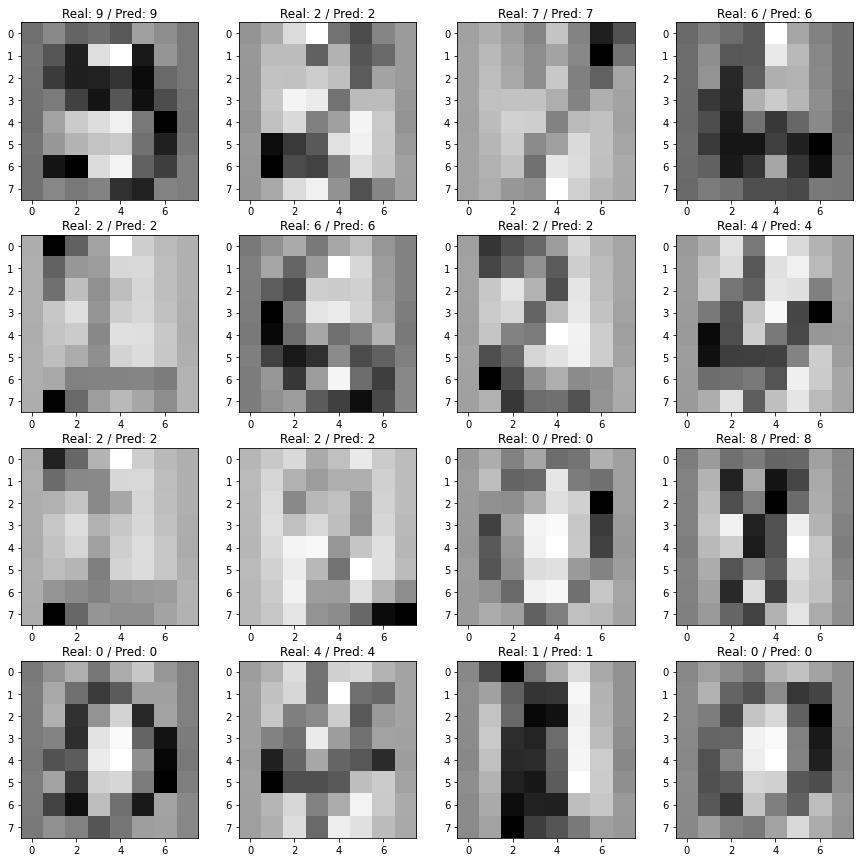

In [17]:
fig, axes = plt.subplots(4,4, figsize=(15,15))

for i,(idx, ax) in enumerate(zip(test_idx, axes.flatten())):
    ax.imshow(X[:,idx].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Real: {true_vals[i]} / Pred: {pred[i]}')

In [18]:
prob_total = model.forward(X)
pred_total = np.argmax(prob_total,axis=0)
true_vals_total = np.argmax(Y, axis=0)

acc = Accuracy()
acc.forward(prob_total, Y)

0.9844097995545658